In [1]:
%matplotlib inline


# Load an FVCOM model output and plot a surface.
from PyFVCOM.read import FileReader
from PyFVCOM.plot import Plotter, Time, Depth
from PyFVCOM.tide import make_water_column
from cmocean import cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import xarray as xr
from datetime import datetime,timedelta
from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
from matplotlib import style
style.use('ggplot')

In [2]:
duanmian = loadmat('duanmian.mat')
duanmian = duanmian['duanmian']

In [3]:
pkl_file = open('../data/summer_wannei_allvars.pkl', 'rb')
fvcom = pickle.load(pkl_file)
fvcom = fvcom['normal']

In [4]:
datapath = '/public/home/gaoguandong/xrsh/work/wind2/OUTDIR_wind1/'
files = datapath + 'cockburn_0058.nc'
print(files)
#dims = {'node':[int(x) for x in index['node']],'nele':[int(x) for x in index['nele']]}
varlist = ['lon']
fvcom2 = FileReader(files, variables=varlist)#,dims = dims)

/public/home/gaoguandong/xrsh/work/wind2/OUTDIR_wind1/cockburn_0058.nc
lon does not contain a time dimension. (/public/home/gaoguandong/xrsh/bin/anaconda3/envs/IOOS/lib/python3.7/site-packages/PyFVCOM/read.py:1228)


In [5]:
llcrnrlon=115.64
urcrnrlon=115.78
#llcrnrlat=-32.28
#urcrnrlat=-32.23
llcrnrlat=-32.29
urcrnrlat=-32.11

def make_map(ax=None,llcrnrlon=-49, urcrnrlon=-39, llcrnrlat=-30, urcrnrlat=-21,lat_0 = -80, lon_0 = 115,
             projection='merc', resolution='h', figsize=(6, 6), inset=True, epsg = 2933):
    m = Basemap(llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon,
                llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat,
                projection = projection, resolution=resolution, lat_0 = lat_0,lon_0 = lon_0)
    m.drawstates()
    #m.drawcoastlines()
    #m.fillcontinents(color='0.85',zorder = 0)
    meridians = np.arange(115.65, urcrnrlon + 2, 0.05)
    parallels = np.arange(-32.3, urcrnrlat + 2, 0.05)
    m.drawparallels(parallels, linewidth=0, labels=[1, 0, 0, 0])
    m.drawmeridians(meridians, linewidth=0, labels=[0, 0, 0, 1])
    m.llcrnrlon = llcrnrlon
    m.urcrnrlon = urcrnrlon
    m.llcrnrlat = llcrnrlat
    m.urcrnrlat = urcrnrlat
    
    m.ax = ax
    return m

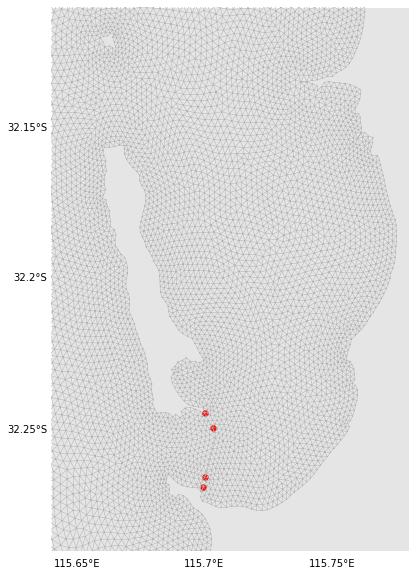

In [7]:
loc = [24069,24212,23940,23796]

fig = plt.figure(figsize = (10,10) )
ax = fig.add_subplot(1,1,1)
m = make_map(llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, figsize=(20, 10)
             ,ax =ax,epsg=32750, lat_0 = -80, lon_0 = 110)
triangles = fvcom2.grid.nv.transpose() - 1
[xx,yy] = m(fvcom2.grid.lon,fvcom2.grid.lat)
m.ax.triplot(xx, yy, triangles, color='0.7', linewidth=0.5, zorder=10)
m.ax.scatter(xx[loc[:]],yy[loc[:]],facecolor = 'red')
#picpath = '/public/home/gaoguandong/xrsh/work/pic/pics/duanmian/'
#plt.savefig(picpath+'duanmianA_loc.png')

In [11]:
np.sqrt((xx[loc[1]]-xx[loc[0]])**2+(yy[loc[1]]-yy[loc[0]])**2)

np.sqrt((xx[loc[3]]-xx[loc[2]])**2+(yy[loc[3]]-yy[loc[2]])**2)

def along_point(x0,y0,x1,y1,n):
    ddx = (x1-x0)/(n-1)
    ddy = (y1-y0)/(n-1)
    dx = np.zeros((n,))
    dy = np.zeros((n,))
    for i in range(n):
        dx[i] = x0+i*ddx
        dy[i] = y0+i*ddy
        
    return dx,dy
        

In [12]:
dxA,dyA = m([x[0] for x in duanmian],[x[1] for x in duanmian])
dxB,dyB = along_point(xx[loc[0]],yy[loc[0]],xx[loc[1]],yy[loc[1]],5)
dxC,dyC = along_point(xx[loc[2]],yy[loc[2]],xx[loc[3]],yy[loc[3]],3)

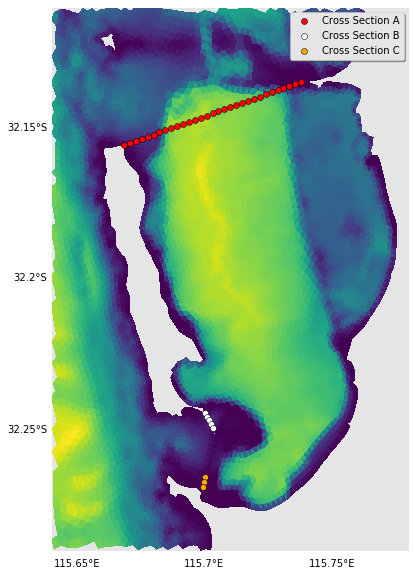

In [13]:
fig = plt.figure(figsize = (10,10) )
ax = fig.add_subplot(1,1,1)
m = make_map(llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, figsize=(20, 10)
             ,ax =ax,epsg=32750, lat_0 = -80, lon_0 = 110)
triangles = fvcom.grid.nv.transpose() - 1
[xx,yy] = m(fvcom.grid.lon,fvcom.grid.lat)
tp2 = m.ax.tripcolor(xx, yy, triangles,fvcom.grid.h)
m.ax.scatter(dxA,dyA,facecolor = 'red',label = 'Cross Section A',edgecolor = 'black')
m.ax.scatter(dxB,dyB,facecolor = 'white',label = 'Cross Section B',edgecolor = 'black')
tp = m.ax.scatter(dxC,dyC,facecolor = 'orange',label = 'Cross Section C',edgecolor = 'black')
m.ax.legend(loc='best', ncol=1, shadow=True, fancybox=True)
plt.savefig('/public/home/gaoguandong/xrsh/work/pic/pics/duanmian/Section_loc.png')

In [14]:
CS_loc = {'A':m(dxA,dyA,'inverse'),'B':m(dxB,dyB,'inverse'),'C':m(dxC,dyC,'inverse')}

with open('CS_loc.pkl','wb') as f:
    pickle.dump(CS_loc,f)

In [15]:
# find near points

In [26]:
from scipy.spatial import cKDTree as KDTree

[xxc,yyc] = m(fvcom2.grid.lonc,fvcom2.grid.latc)
Xe = np.zeros((xxc.shape[0],2))
Xe[:,0] = xxc
Xe[:,1] = yyc

[xx,yy] = m(fvcom2.grid.lon,fvcom2.grid.lat)
Xn = np.zeros((xx.shape[0],2))
Xn[:,0] = xx
Xn[:,1] = yy

dloc = np.zeros((8,2))
dloc[:,0] = np.append(dxB,dxC)
dloc[:,1] = np.append(dyB,dyC)

tree = KDTree(Xn, leafsize=10 )  # build the tree
distances, ix = tree.query( dloc, k=32, eps=0 )
treec = KDTree(Xe, leafsize=10 )
distances, ixc = treec.query( dloc, k=32, eps=0 )
ix = np.unique(ix)
ixc = np.unique(ixc)

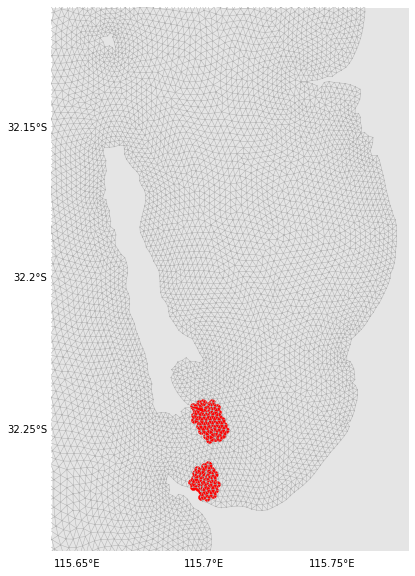

In [27]:
fig = plt.figure(figsize = (10,10) )
ax = fig.add_subplot(1,1,1)
m = make_map(llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, figsize=(20, 10)
             ,ax =ax,epsg=32750, lat_0 = -80, lon_0 = 110)
triangles = fvcom2.grid.nv.transpose() - 1
[xx,yy] = m(fvcom2.grid.lon,fvcom2.grid.lat)
m.ax.triplot(xx, yy, triangles, color='0.7', linewidth=0.5, zorder=10)
m.ax.scatter(xx[ix],yy[ix],facecolor = 'red')

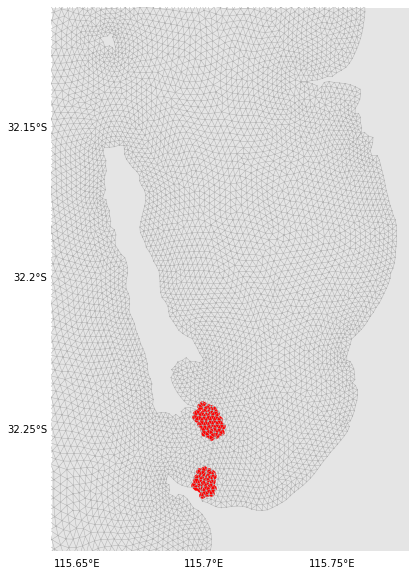

In [28]:
fig = plt.figure(figsize = (10,10) )
ax = fig.add_subplot(1,1,1)
m = make_map(llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, figsize=(20, 10)
             ,ax =ax,epsg=32750, lat_0 = -80, lon_0 = 110)
triangles = fvcom2.grid.nv.transpose() - 1
[xx,yy] = m(fvcom2.grid.lon,fvcom2.grid.lat)
m.ax.triplot(xx, yy, triangles, color='0.7', linewidth=0.5, zorder=10)
m.ax.scatter(xxc[ixc],yyc[ixc],facecolor = 'red')

In [29]:
with open('zhouwei.pkl','wb') as f:
    pickle.dump({'node':ix,'nele':ixc},f)

In [25]:
ix

array([23484, 23649, 23650, 23651, 23652, 23653, 23783, 23784, 23793,
       23794, 23795, 23796, 23797, 23927, 23928, 23929, 23930, 23931,
       23939, 23940, 23941, 23942, 23943, 23944, 24069, 24070, 24071,
       24072, 24073, 24074, 24081, 24082, 24083, 24084, 24085, 24087,
       24206, 24207, 24208, 24209, 24210, 24211, 24212, 24213, 24214,
       24216, 24340, 24341, 24342, 24344, 24345, 24346, 24347, 24348,
       24480, 24489, 24490, 24491, 24622])